In [1]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据集，查看数据集属性
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [57]:
# 数据集一共是150个样本，4个特征，3种分类，每种分类是50个样本
print('DataSet Shape: ', iris.data.shape)
# 分类dummy
print('Label: ', np.unique(y))

DataSet Shape (150, 4)
Label:  [0 1 2]


In [4]:
# 把数据转成dataframe，查看数据样例
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
# 查看特征分布，可以看到没有缺失值
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# 各个类别的index
indices_0 = np.argwhere(y == 0)
indices_1 = np.argwhere(y == 1)
indices_2 = np.argwhere(y == 2)

Text(0, 0.5, 'Petal width (cm)')

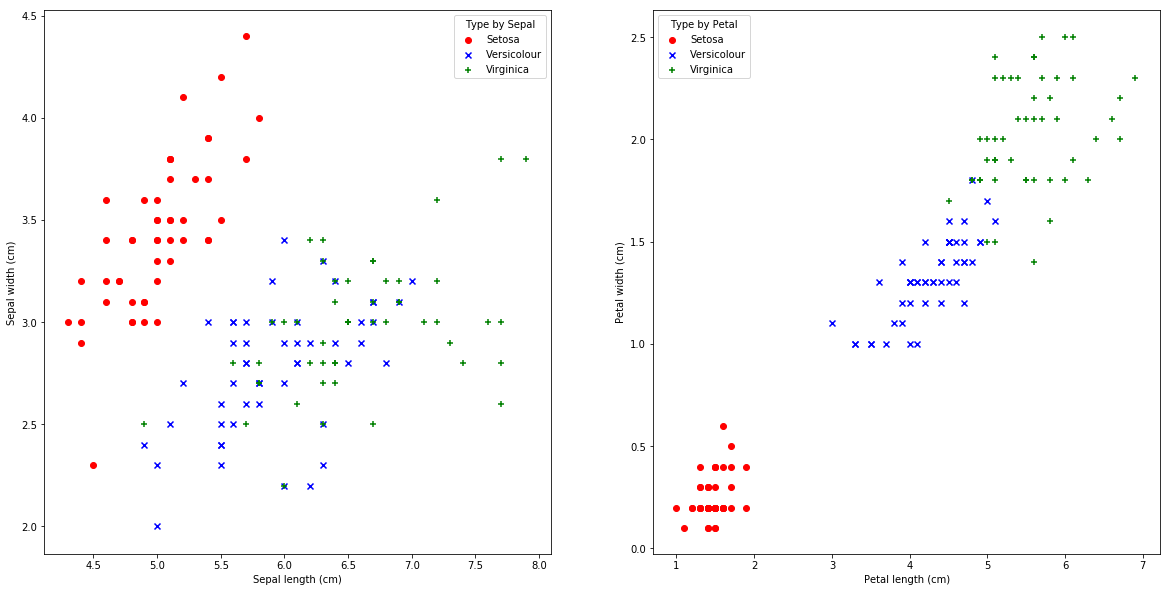

In [7]:
# 根据sepal和petal做可视化
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(X[:, 0][indices_0], X[:, 1][indices_0], color='red', marker='o', label='Setosa')
plt.scatter(X[:, 0][indices_1], X[:, 1][indices_1], color='blue', marker='x', label='Versicolour')
plt.scatter(X[:, 0][indices_2], X[:, 1][indices_2], color='green', marker='+', label='Virginica')
plt.legend(loc='best', title='Type by Sepal')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.subplot(122)
plt.scatter(X[:, 2][indices_0], X[:, 3][indices_0], color='red', marker='o', label='Setosa')
plt.scatter(X[:, 2][indices_1], X[:, 3][indices_1], color='blue', marker='x', label='Versicolour')
plt.scatter(X[:, 2][indices_2], X[:, 3][indices_2], color='green', marker='+', label='Virginica')
plt.legend(loc='best', title='Type by Petal')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

In [8]:
# 拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report

lr = LogisticRegression(C = 10, penalty = 'l2')
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_train)
y_pred = y_pred.argmax(axis=1)
lr.score(X_train, y_train)

C:\Users\XiXiao\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\XiXiao\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9666666666666667

In [45]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(5, shuffle = False)
c_set = [0.01, 0.1, 1, 10, 100]
res = pd.DataFrame(index = range(len(c_set), 2), columns = ['c', 'mean recall'])
res['c'] = c_set
j = 0
for c in c_set:
    scores = []
    for iteration, indices in enumerate(kf.split(X_train), start = 1):
        lr = LogisticRegression(C = c, penalty = 'l2', multi_class='ovr', solver='liblinear')
        lr.fit(X_train, y_train)
        score = lr.score(X_train, y_train)
        print('Round: ', iteration, ', score = ', score)
        scores.append(score)
    res.loc[j, 'mean score'] = np.mean(scores)
    print('mean score: ', np.mean(scores))
    j += 1

best_c = res.loc[res['mean score'].values.argmax()]['c']
print('')
print('Best c: ', best_c)

Round:  1 , score =  0.6916666666666667
Round:  2 , score =  0.6916666666666667
Round:  3 , score =  0.6916666666666667
Round:  4 , score =  0.6916666666666667
Round:  5 , score =  0.6916666666666667
mean score:  0.6916666666666667
Round:  1 , score =  0.7333333333333333
Round:  2 , score =  0.7333333333333333
Round:  3 , score =  0.7333333333333333
Round:  4 , score =  0.7333333333333333
Round:  5 , score =  0.7333333333333333
mean score:  0.7333333333333333
Round:  1 , score =  0.9333333333333333
Round:  2 , score =  0.9333333333333333
Round:  3 , score =  0.9333333333333333
Round:  4 , score =  0.9333333333333333
Round:  5 , score =  0.9333333333333333
mean score:  0.9333333333333333
Round:  1 , score =  0.9666666666666667
Round:  2 , score =  0.9666666666666667
Round:  3 , score =  0.9666666666666667
Round:  4 , score =  0.9666666666666667
Round:  5 , score =  0.9666666666666667
mean score:  0.9666666666666666
Round:  1 , score =  0.975
Round:  2 , score =  0.975
Round:  3 , score 

In [52]:
# 用KNN预测看看
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
print(knc_pred)
print(y_test)

probility = knc.predict_proba(X_test)
score = knc.score(X_test, y_test, sample_weight = None)
print(probility)
print(nbs)
print(score)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[[0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.4 0.6]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]]
[[ 81  13 108  69  58]]
0.9666666666666667


In [9]:

from sklearn import tree

dtr = tree.DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)


1.0

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=5, random_state=0)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9579381443298969

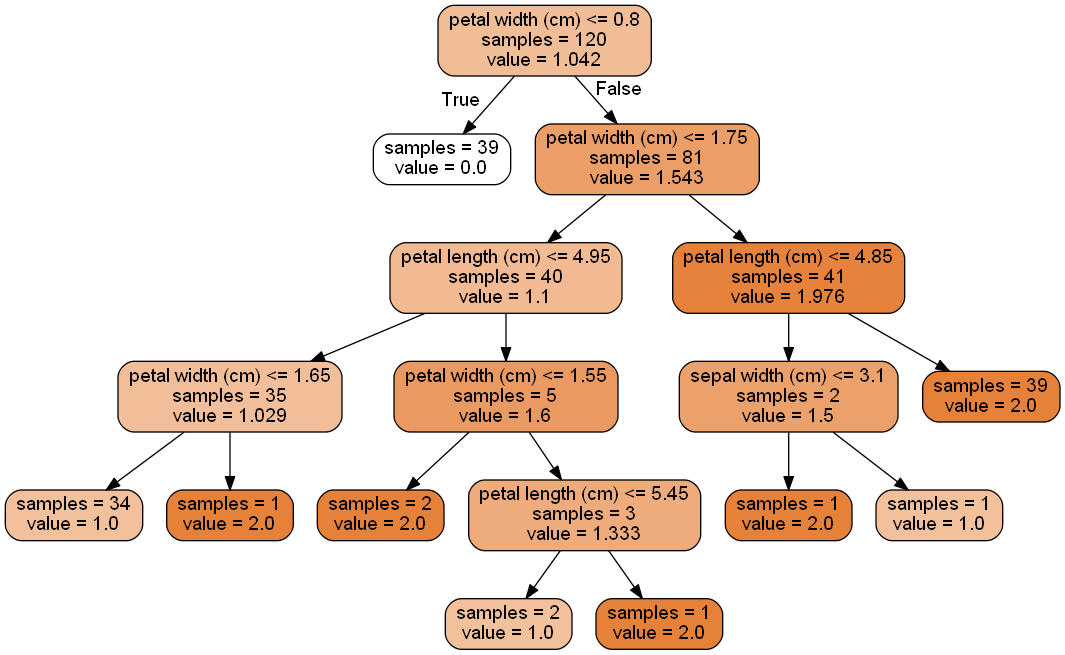

In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(
        dtr,
        out_file = None,
        feature_names = iris.feature_names,
        filled = True,
        impurity = False,
        rounded = True
    )


import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()

from IPython.display import Image
Image(graph.create_png())